In [3]:
%pip install faker

# 1. Dummy 데이터 생성하기

In [1]:
import pandas as pd
import numpy as np
from faker import Faker

## 사람이름 랜덤으로 만들어주는 라이브러리
fake = Faker(['en_US', 'ko_KR'])

## 데이터의 크기 설정
size = 10_000

## 빈 데이터프레임 설정
df = pd.DataFrame()

'''
[원하는 데이터 생성]
1. 데이터프레임[컬럼명] = 데이터, 데이터의 크기
2. numpy 기능 중 random기능을 활용함
'''
df['date'] = pd.date_range(start="1993-04-13", periods=size)
df['name'] = [fake.name() for _ in range(size)]
df['address'] = [fake.address() for _ in range(size)]
df['birthday'] = [fake.date_of_birth(minimum_age=8, maximum_age=100) for _ in range(size)]

df['position'] = np.random.choice(["left", 'middle','right'], size)
df['age'] = np.random.randint(8, 100, size)
df['value'] = np.random.sample(size)
df['binary'] = np.random.randint(0, 2, size)

df['color'] = np.random.choice(["red", 'blue','yellow','green'], size)
df['win'] = np.random.choice(["yes", 'no'], size)
df['Check'] = np.random.choice(["T", 'F'], size)
df['animal'] = np.random.choice(["Snake", 'Elephant','Lion','Tiger','Dog','Cat','Rat',
                                 'Panda','Bear','Zebra','Chicken','Cow','Dragon','Pig','Hog'], size)
df['country'] = np.random.choice(['Cananda','Korea','United States', 'United Kingdom', 'Japan', 'China',
                                  'India','Czech' ,'Brazil','Austrailia'], size)
df['rank'] = np.random.choice(['Bronze', 'Silver', 'Gold','Platinum','Emerald','Diamond','Master','GrandMaster','Challenger'], size)

df['prob'] = np.random.uniform(0, 1, size)

## null값 주입
nan_percentage = 0.1 # null값 비율
nan_count = int(size * nan_percentage)
nan_indices = np.random.choice(df.index, nan_count, replace=False)

df.loc[nan_indices, 'value'] = np.nan

In [5]:
df.head()

,date,name,address,birthday,position,age,value,binary,color,win,Check,animal,country,rank,prob
0,1993-04-13,김영길,대구광역시 송파구 역삼4가,2003-11-11,middle,48,0.175969,1,blue,yes,F,Pig,United Kingdom,Diamond,0.850970
1,1993-04-14,Donna Burnett,"913 Ward Station\nJacobsonberg, NY 33941",1998-11-16,left,68,0.139352,1,blue,no,T,Pig,Korea,GrandMaster,0.025814
2,1993-04-15,권성민,경상남도 안산시 단원구 서초중앙로,1948-11-07,right,78,0.293346,0,red,yes,T,Panda,China,Bronze,0.263772
3,1993-04-16,Jeffery Wright,"39226 John Crossroad Suite 558\nPort Mary, IL ...",1956-10-21,right,69,0.336964,1,yellow,yes,F,Panda,India,Challenger,0.718701
4,1993-04-17,David Marshall,"7099 Mary Ridges Apt. 740\nPort Jacob, MN 64140",1926-09-20,left,47,0.171253,0,red,no,F,Zebra,Korea,Silver,0.635959


## 1-1. 데이터 살펴보기

In [6]:
## 데이터프레임을 넣고 column별 특성 및 결측값, 고유값들을 확인하는 함수를 작성해본다.
## 필수는 아니지만 전체적인 흐름을 파악하기 쉬워진다.

def resumetable(df):
  print(f'데이터셋 크기: {df.shape}')
  summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
  summary = summary.reset_index()
  summary = summary.rename(columns={'index':'피처'})
  summary['결측값 개수'] = df.isnull().sum().values
  summary['고유값 개수'] = df.nunique().values
  summary['첫 번째 값'] = df.loc[0].values
  summary['두 번째 값'] = df.loc[1].values
  summary['세 번째 값'] = df.loc[2].values

  return summary

In [7]:
resumetable(df)

데이터셋 크기: (10000, 15)


,피처,데이터 타입,결측값 개수,고유값 개수,첫 번째 값,두 번째 값,세 번째 값
0,date,datetime64[ns],0,10000,1993-04-13 00:00:00,1993-04-14 00:00:00,1993-04-15 00:00:00
1,name,object,0,6899,김영길,Donna Burnett,권성민
2,address,object,0,9995,대구광역시 송파구 역삼4가,"913 Ward Station\nJacobsonberg, NY 33941",경상남도 안산시 단원구 서초중앙로
3,birthday,object,0,8642,2003-11-11,1998-11-16,1948-11-07
4,position,object,0,3,middle,left,right
5,age,int32,0,92,48,68,78
6,value,float64,1000,9000,0.175969,0.139352,0.293346
7,binary,int32,0,2,1,1,0
8,color,object,0,4,blue,blue,red
9,win,object,0,2,yes,no,yes


In [8]:
for column in df.columns:
  if df[column].dtype == 'object' and column not in ['name', 'address']:  # object 타입 중에서 name, address는 고유한 값이 많았으니 표기하지 않도록 조건 설정
    print(f'{column} 고윳값: {df[column].unique()}')

birthday 고윳값: [datetime.date(2003, 11, 11) datetime.date(1998, 11, 16)
 datetime.date(1948, 11, 7) ... datetime.date(1964, 10, 8)
 datetime.date(1999, 7, 17) datetime.date(1949, 8, 20)]
position 고윳값: ['middle' 'left' 'right']
color 고윳값: ['blue' 'red' 'yellow' 'green']
win 고윳값: ['yes' 'no']
Check 고윳값: ['F' 'T']
animal 고윳값: ['Pig' 'Panda' 'Zebra' 'Bear' 'Hog' 'Cat' 'Tiger' 'Elephant' 'Dragon'
 'Rat' 'Lion' 'Chicken' 'Cow' 'Snake' 'Dog']
country 고윳값: ['United Kingdom' 'Korea' 'China' 'India' 'Czech' 'Cananda'
 'United States' 'Japan' 'Austrailia' 'Brazil']
rank 고윳값: ['Diamond' 'GrandMaster' 'Bronze' 'Challenger' 'Silver' 'Emerald' 'Gold'
 'Platinum' 'Master']


#### Question
DataFrame에서 데이터타입이 float64인 컬럼 중에서 고윳값의 갯수가 100개가 넘어가는 것을 제외한 컬럼들의 고윳값들을 출력해주세요.

In [16]:
for column in df.columns:
  if df[column].dtype == "int32" and df[column].nunique() < 100: # 조건을 만족한는 float 데이터가 없어 int로 대체
      print(f'{column}의 고유값: {df[column].unique()}')

age의 고유값: [48 68 78 69 47 12 33 29 58 37 40 46 57 83 16 10 51 27 36  9 98 91 94 11
 75 70 49 67 90 39 84 42 44 63 52 53 20 18 15 65 60 56 97 32 43 21  8 64
 14 45 50 24 28 26 31 88 99 19 55 30 25 59 13 86 62 76 61 89 96 95 38 22
 92 82 85 93 79 23 35 87 34 73 74 72 54 41 77 81 71 80 17 66]
binary의 고유값: [1 0]


In [17]:
date_df = df.copy()
date = date_df.date
date_df['year'] = date.dt.year
date_df['month'] = date.dt.month
date_df['weekday'] = date.dt.weekday
date_df['week'] = date.dt.isocalendar().week
date_df['quarter'] = date.dt.quarter
date_df['dayofyear'] = date.dt.dayofyear
date_df.head()

,date,name,address,birthday,position,age,value,binary,color,win,...,animal,country,rank,prob,year,month,weekday,week,quarter,dayofyear
0,1993-04-13,김영길,대구광역시 송파구 역삼4가,2003-11-11,middle,48,0.175969,1,blue,yes,...,Pig,United Kingdom,Diamond,0.850970,1993,4,1,15,2,103
1,1993-04-14,Donna Burnett,"913 Ward Station\nJacobsonberg, NY 33941",1998-11-16,left,68,0.139352,1,blue,no,...,Pig,Korea,GrandMaster,0.025814,1993,4,2,15,2,104
2,1993-04-15,권성민,경상남도 안산시 단원구 서초중앙로,1948-11-07,right,78,0.293346,0,red,yes,...,Panda,China,Bronze,0.263772,1993,4,3,15,2,105
3,1993-04-16,Jeffery Wright,"39226 John Crossroad Suite 558\nPort Mary, IL ...",1956-10-21,right,69,0.336964,1,yellow,yes,...,Panda,India,Challenger,0.718701,1993,4,4,15,2,106
4,1993-04-17,David Marshall,"7099 Mary Ridges Apt. 740\nPort Jacob, MN 64140",1926-09-20,left,47,0.171253,0,red,no,...,Zebra,Korea,Silver,0.635959,1993,4,5,15,2,107


## 1-2. 결측치 처리하기
### (1) interpolate


In [18]:
import matplotlib.pyplot as plt

interpolate_df = df.copy()

In [19]:
print("Value에 Null이 있는 데이터의 수: ", interpolate_df[interpolate_df.isna().any(axis=1)].shape[0])
interpolate_df[interpolate_df.isna().any(axis=1)]

Value에 Null이 있는 데이터의 수:  1000


,date,name,address,birthday,position,age,value,binary,color,win,Check,animal,country,rank,prob
14,1993-04-27,구중수,"777 Thomas Skyway\nNorth Carl, NM 82647",1991-08-29,middle,16,NaN,1,blue,yes,T,Dragon,Japan,Challenger,0.590286
38,1993-05-21,Michael Dixon,제주특별자치도 광주시 석촌호수길,1998-10-16,middle,84,NaN,1,yellow,yes,F,Cow,Korea,Emerald,0.108044
56,1993-06-08,Marissa Tran,"43672 Christie Village Apt. 024\nEast Ryan, AK...",1966-12-24,middle,97,NaN,1,red,yes,T,Cat,China,Master,0.166419
59,1993-06-11,강지혜,"2348 Joyce Route\nNicoleton, ID 45708",1975-11-24,left,21,NaN,0,green,no,F,Dog,China,GrandMaster,0.081510
62,1993-06-14,Morgan Jackson,광주광역시 금천구 논현54가 (경수김홍읍),1933-09-10,left,8,NaN,0,red,yes,T,Tiger,India,GrandMaster,0.844603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9960,2020-07-20,김정희,울산광역시 은평구 석촌호수4로 (현숙강읍),1971-06-06,middle,58,NaN,1,blue,yes,T,Zebra,Japan,Bronze,0.915099
9970,2020-07-30,Kenneth Franco,"89866 Judy Tunnel Suite 784\nSmithfurt, CT 12436",1981-11-18,left,27,NaN,0,red,no,F,Hog,Japan,Diamond,0.318971
9972,2020-08-01,김은정,광주광역시 은평구 테헤란가 (서연김강리),1979-01-07,middle,15,NaN,0,yellow,no,T,Dog,United States,Platinum,0.588309
9986,2020-08-15,Margaret Jimenez,"058 Mark Crescent Apt. 441\nMarkhaven, TX 13667",1978-03-11,middle,60,NaN,1,red,no,F,Cat,United States,Silver,0.994568


In [13]:
interpolate_df = df.copy()

# 랜덤하게 생성된 데이터이기 때문에 null값이 들어가 있는 데이터의 인덱스를 저장하여 매번 확인할 수 있도록 변수로 지정하여 출력
null_data_index = interpolate_df[interpolate_df.isna().any(axis=1)].index[0]

# front fill로 처리할 경우 바로 앞의 인덱스의 있는 값으로 채워진 모습을 볼 수 있음
ffill_df = interpolate_df.interpolate('ffill')
ffill_df[null_data_index-2:null_data_index+3]  # null값이 있던 데이터의 위아래 2개씩 출력하여 확인함

C:\Users\kwon3\AppData\Local\Temp\ipykernel_21328\2997495552.py:7: FutureWarning: DataFrame.interpolate with method=ffill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ffill_df = interpolate_df.interpolate('ffill')


,date,name,address,birthday,position,age,value,binary,color,win,Check,animal,country,rank,prob
4,1993-04-17,이성현,"577 Wheeler Falls Apt. 333\nDanielfurt, KY 67730",1941-02-22,right,67,0.343273,0,green,yes,T,Cat,Czech,Emerald,0.151289
5,1993-04-18,Dorothy Conrad,충청남도 안성시 봉은사길,1954-01-12,right,76,0.005045,0,blue,no,T,Elephant,Austrailia,Challenger,0.684292
6,1993-04-19,Natalie Boyd,경상북도 성남시 봉은사82로 (지민김이마을),1933-05-24,right,9,0.005045,0,green,yes,F,Pig,Japan,Platinum,0.782131
7,1993-04-20,윤진호,"PSC 2677, Box 3192\nAPO AE 28280",2003-12-03,middle,79,0.701320,1,red,yes,T,Snake,India,Gold,0.799265
8,1993-04-21,박성수,"928 Paul Circle Suite 252\nStaceyville, KS 02584",1969-04-17,middle,25,0.483073,0,blue,yes,F,Dragon,Cananda,Emerald,0.307386


In [14]:
bfill_df = interpolate_df.interpolate('bfill')
bfill_df[null_data_index-2:null_data_index+3]

C:\Users\kwon3\AppData\Local\Temp\ipykernel_21328\2339173711.py:1: FutureWarning: DataFrame.interpolate with method=bfill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  bfill_df = interpolate_df.interpolate('bfill')


,date,name,address,birthday,position,age,value,binary,color,win,Check,animal,country,rank,prob
4,1993-04-17,이성현,"577 Wheeler Falls Apt. 333\nDanielfurt, KY 67730",1941-02-22,right,67,0.343273,0,green,yes,T,Cat,Czech,Emerald,0.151289
5,1993-04-18,Dorothy Conrad,충청남도 안성시 봉은사길,1954-01-12,right,76,0.005045,0,blue,no,T,Elephant,Austrailia,Challenger,0.684292
6,1993-04-19,Natalie Boyd,경상북도 성남시 봉은사82로 (지민김이마을),1933-05-24,right,9,0.701320,0,green,yes,F,Pig,Japan,Platinum,0.782131
7,1993-04-20,윤진호,"PSC 2677, Box 3192\nAPO AE 28280",2003-12-03,middle,79,0.701320,1,red,yes,T,Snake,India,Gold,0.799265
8,1993-04-21,박성수,"928 Paul Circle Suite 252\nStaceyville, KS 02584",1969-04-17,middle,25,0.483073,0,blue,yes,F,Dragon,Cananda,Emerald,0.307386


In [15]:
# 선형보간법
linear_df = interpolate_df.copy()
polynomial_df = interpolate_df.copy()

linear_df['value'] = linear_df['value'].interpolate('linear') # 첫점과 끝점 (일차식 보간)
polynomial_df['value'] = polynomial_df['value'].interpolate('polynomial', order=3) # 다항식 보간 (차수 지정해줘야함)

linear_df[null_data_index-2:null_data_index+3]

,date,name,address,birthday,position,age,value,binary,color,win,Check,animal,country,rank,prob
4,1993-04-17,이성현,"577 Wheeler Falls Apt. 333\nDanielfurt, KY 67730",1941-02-22,right,67,0.343273,0,green,yes,T,Cat,Czech,Emerald,0.151289
5,1993-04-18,Dorothy Conrad,충청남도 안성시 봉은사길,1954-01-12,right,76,0.005045,0,blue,no,T,Elephant,Austrailia,Challenger,0.684292
6,1993-04-19,Natalie Boyd,경상북도 성남시 봉은사82로 (지민김이마을),1933-05-24,right,9,0.353182,0,green,yes,F,Pig,Japan,Platinum,0.782131
7,1993-04-20,윤진호,"PSC 2677, Box 3192\nAPO AE 28280",2003-12-03,middle,79,0.701320,1,red,yes,T,Snake,India,Gold,0.799265
8,1993-04-21,박성수,"928 Paul Circle Suite 252\nStaceyville, KS 02584",1969-04-17,middle,25,0.483073,0,blue,yes,F,Dragon,Cananda,Emerald,0.307386


In [16]:
polynomial_df[null_data_index-2:null_data_index+3]

,date,name,address,birthday,position,age,value,binary,color,win,Check,animal,country,rank,prob
4,1993-04-17,이성현,"577 Wheeler Falls Apt. 333\nDanielfurt, KY 67730",1941-02-22,right,67,0.343273,0,green,yes,T,Cat,Czech,Emerald,0.151289
5,1993-04-18,Dorothy Conrad,충청남도 안성시 봉은사길,1954-01-12,right,76,0.005045,0,blue,no,T,Elephant,Austrailia,Challenger,0.684292
6,1993-04-19,Natalie Boyd,경상북도 성남시 봉은사82로 (지민김이마을),1933-05-24,right,9,0.346024,0,green,yes,F,Pig,Japan,Platinum,0.782131
7,1993-04-20,윤진호,"PSC 2677, Box 3192\nAPO AE 28280",2003-12-03,middle,79,0.701320,1,red,yes,T,Snake,India,Gold,0.799265
8,1993-04-21,박성수,"928 Paul Circle Suite 252\nStaceyville, KS 02584",1969-04-17,middle,25,0.483073,0,blue,yes,F,Dragon,Cananda,Emerald,0.307386


### (2) 2-way Delete NaN

In [17]:
row_df = df.copy()
col_df = df.copy()

In [18]:
row_df = row_df.dropna(axis=0) # default값 행 삭제
print(f"처리 후 데이터 크기: {row_df.shape}")
row_df[null_data_index-2:null_data_index+3]

처리 후 데이터 크기: (9000, 15)


,date,name,address,birthday,position,age,value,binary,color,win,Check,animal,country,rank,prob
4,1993-04-17,이성현,"577 Wheeler Falls Apt. 333\nDanielfurt, KY 67730",1941-02-22,right,67,0.343273,0,green,yes,T,Cat,Czech,Emerald,0.151289
5,1993-04-18,Dorothy Conrad,충청남도 안성시 봉은사길,1954-01-12,right,76,0.005045,0,blue,no,T,Elephant,Austrailia,Challenger,0.684292
7,1993-04-20,윤진호,"PSC 2677, Box 3192\nAPO AE 28280",2003-12-03,middle,79,0.701320,1,red,yes,T,Snake,India,Gold,0.799265
8,1993-04-21,박성수,"928 Paul Circle Suite 252\nStaceyville, KS 02584",1969-04-17,middle,25,0.483073,0,blue,yes,F,Dragon,Cananda,Emerald,0.307386
9,1993-04-22,Tracey Montgomery,울산광역시 강동구 오금길,1989-12-18,left,93,0.769644,0,green,no,F,Rat,Cananda,Gold,0.382091


In [19]:
col_df.dropna(how='all') # 모든 열이 Null인 값을 제거할 때 사용
print(f"Column 갯수: {len(col_df.columns)}")
col_df = col_df.dropna(axis=1) # null이 하나라도 존재하는 column 삭제
print(f"처리 후 column 갯수: {len(col_df.columns)}")
col_df[null_data_index-2:null_data_index+3]

Column 갯수: 15
처리 후 column 갯수: 14


,date,name,address,birthday,position,age,binary,color,win,Check,animal,country,rank,prob
4,1993-04-17,이성현,"577 Wheeler Falls Apt. 333\nDanielfurt, KY 67730",1941-02-22,right,67,0,green,yes,T,Cat,Czech,Emerald,0.151289
5,1993-04-18,Dorothy Conrad,충청남도 안성시 봉은사길,1954-01-12,right,76,0,blue,no,T,Elephant,Austrailia,Challenger,0.684292
6,1993-04-19,Natalie Boyd,경상북도 성남시 봉은사82로 (지민김이마을),1933-05-24,right,9,0,green,yes,F,Pig,Japan,Platinum,0.782131
7,1993-04-20,윤진호,"PSC 2677, Box 3192\nAPO AE 28280",2003-12-03,middle,79,1,red,yes,T,Snake,India,Gold,0.799265
8,1993-04-21,박성수,"928 Paul Circle Suite 252\nStaceyville, KS 02584",1969-04-17,middle,25,0,blue,yes,F,Dragon,Cananda,Emerald,0.307386


# 2. 데이터 시각화
#### 수치형 데이터의 분포를 파악할 땐 주로 displot()을 사용하고 범주형 데이터의 분포를 파악할 땐 countplot()을 사용

In [20]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

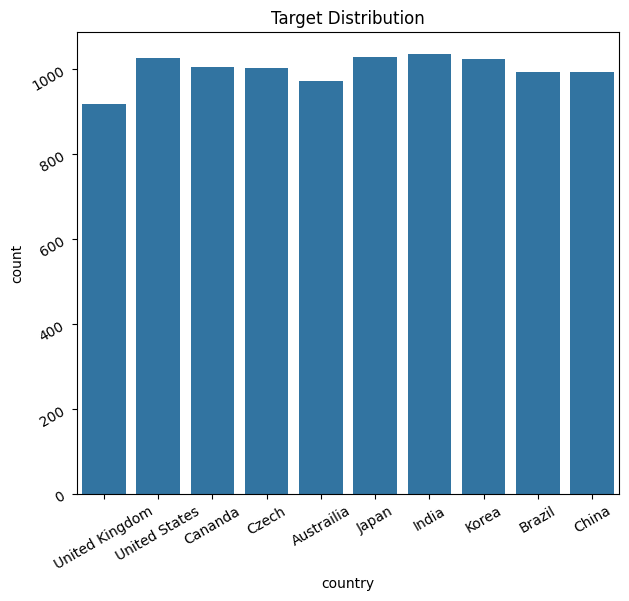

In [21]:
mpl.rc('font', size=10) # 폰트 크기 설정
plt.figure(figsize=(7, 6)) # Figure 크기 설정
plt.xticks(rotation=30)  # x축 글씨 회전
plt.yticks(rotation=30)  # y축 글씨 회전

# 타겟값 분포 카운트플롯
ax = sns.countplot(x='country', data=df)
ax.set_title('Target Distribution');

In [22]:
rectangle = ax.patches[0] # 첫번째 Rectangle 객체
print('사각형의 높이:', rectangle.get_height())
print('사각형의 너비:', rectangle.get_width())
print('사각형 왼쪽 테두리의 x축 위치:', rectangle.get_x())

사각형의 높이: 918.0
사각형의 너비: 0.8
사각형 왼쪽 테두리의 x축 위치: -0.4


In [23]:
print('텍스트 위치의 x좌표:', rectangle.get_x() + rectangle.get_width() / 2.0)
print('텍스트 위치의 y좌표:', rectangle.get_height() + len(df) * 0.001)

텍스트 위치의 x좌표: 0.0
텍스트 위치의 y좌표: 928.0


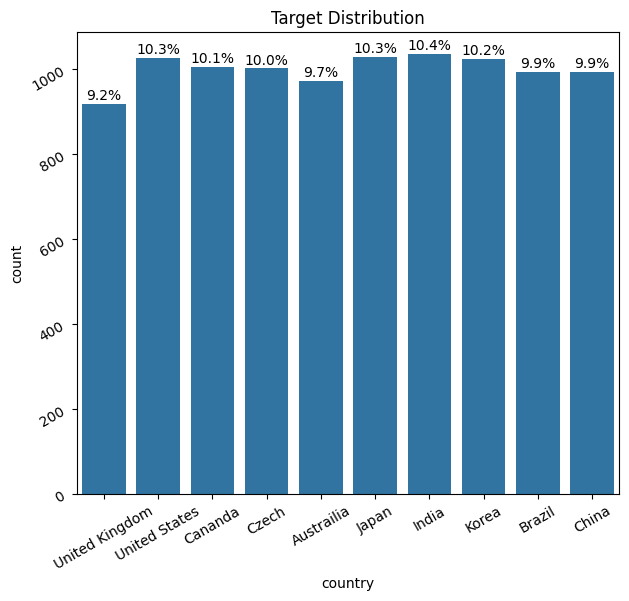

In [24]:
def write_percent(ax, total_size):
    '''도형 객체를 순회하며 막대 상단에 타겟값 비율 표시'''
    for patch in ax.patches:
        height = patch.get_height()     # 도형 높이(데이터 개수)
        width = patch.get_width()       # 도형 너비
        left_coord = patch.get_x()      # 도형 왼쪽 테두리의 x축 위치
        percent = height/total_size*100 # 타겟값 비율

        # (x, y) 좌표에 텍스트 입력
        ax.text(x=left_coord + width/2.0,    # x축 위치
                y=height + total_size*0.001, # y축 위치
                s=f'{percent:1.1f}%',        # 입력 텍스트
                ha='center')                 # 가운데 정렬

plt.figure(figsize=(7, 6))
plt.xticks(rotation=30)
plt.yticks(rotation=30)

ax = sns.countplot(x='country', data=df)
write_percent(ax, len(df))  # 비율 표시
ax.set_title('Target Distribution');

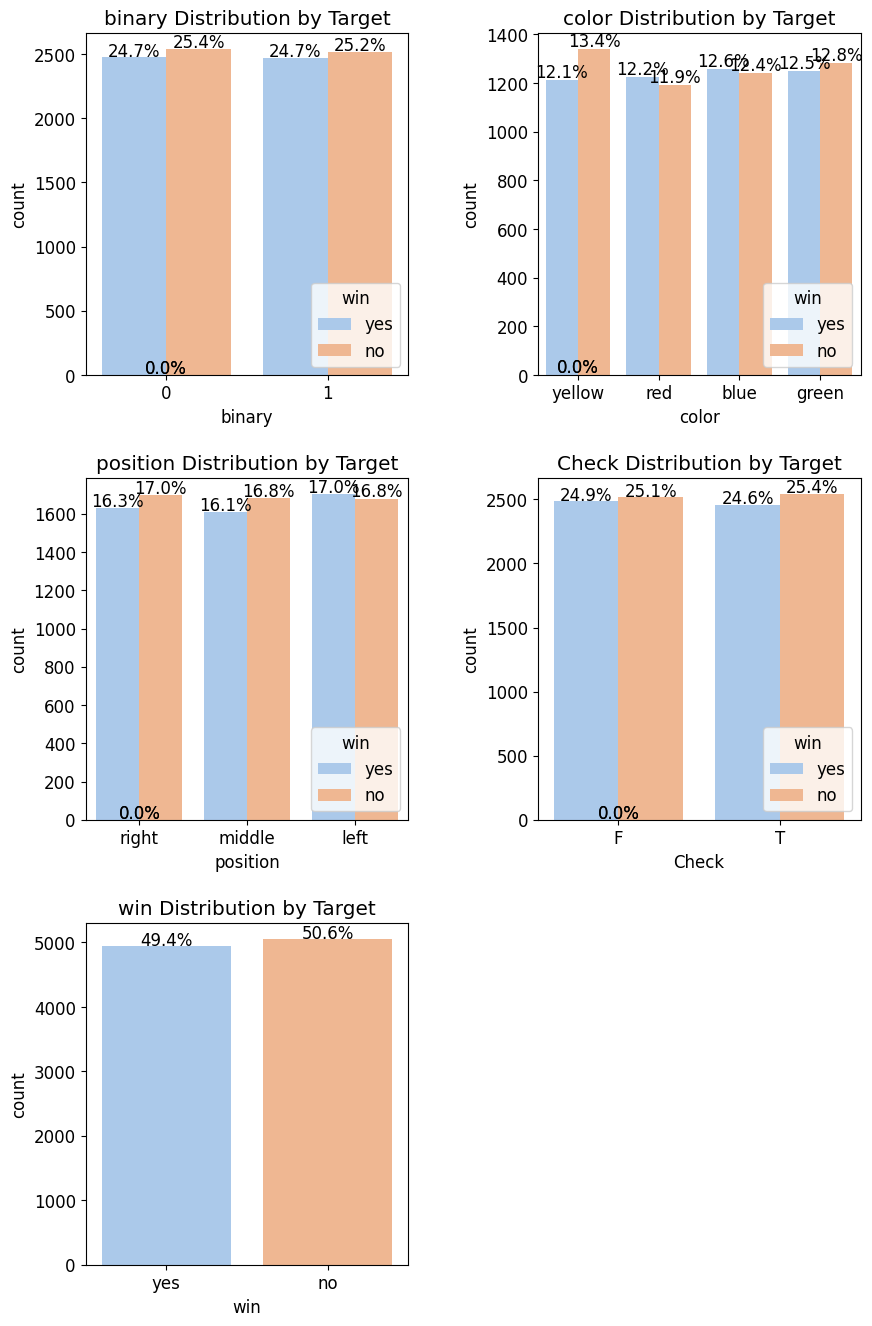

In [25]:
import matplotlib.gridspec as gridspec # 여러 그래프를 격자 형태로 배치
# 3행 2열 Figure(틀) 준비
mpl.rc('font', size=12)
grid = gridspec.GridSpec(3, 2) # 그래프(서브플롯)를 3행 2열로 배치
plt.figure(figsize=(10, 16))   # 전체 Figure 크기 설정
plt.subplots_adjust(wspace=0.4, hspace=0.3) # 서브플롯 간 좌우/상하 여백 설정

# 서브플롯 그리기
bin_features = ['binary','color', 'position', 'Check', 'win']  # 피처 목록

for idx, feature in enumerate(bin_features):
    ax = plt.subplot(grid[idx])

    # ax축에 타겟값 분포 카운트플롯 그리기
    sns.countplot(x=feature,
                  data=df,
                  hue='win',        # 어떤 컬럼을 기준으로 분포를 볼 것인지?
                  palette='pastel', # 그래프 색상 설정
                  ax=ax)

    ax.set_title(f'{feature} Distribution by Target')  # 그래프 제목 설정
    write_percent(ax, len(df))

Step1. 교차분석표 생성 함수 만들기  
Step2. 포인트플롯 생성 함수 만들기  
Step3. 피처 분포도 및 포인트플롯 생성 함수 만들기

In [26]:
pd.crosstab(df['color'], df['binary'])

binary,0,1
color,,
blue,1225,1274
green,1257,1275
red,1240,1177
yellow,1290,1262


In [27]:
# 정규화 후 비율을 백분율로 표현
crosstab = pd.crosstab(df['color'], df['binary'], normalize='index') * 100
crosstab

binary,0,1
color,,
blue,49.019608,50.980392
green,49.644550,50.355450
red,51.303269,48.696731
yellow,50.548589,49.451411


In [28]:
crosstab = crosstab.reset_index()
crosstab

binary,color,0,1
0,blue,49.019608,50.980392
1,green,49.644550,50.355450
2,red,51.303269,48.696731
3,yellow,50.548589,49.451411


In [29]:
def get_crosstab(df, feature):
    crosstab = pd.crosstab(df[feature], df['binary'], normalize='index')*100 # 특정 컬럼과 binary의 분포를 확인할 수 있는 함수
    crosstab = crosstab.reset_index()
    return crosstab

In [30]:
crosstab = get_crosstab(df, 'rank')
crosstab

binary,rank,0,1
0,Bronze,51.160631,48.839369
1,Challenger,48.090909,51.909091
2,Diamond,50.679964,49.320036
3,Emerald,50.213129,49.786871
4,Gold,50.865998,49.134002
5,GrandMaster,49.643494,50.356506
6,Master,50.225836,49.774164
7,Platinum,47.193149,52.806851
8,Silver,52.735043,47.264957


In [31]:
crosstab[1]

0    48.839369
1    51.909091
2    49.320036
3    49.786871
4    49.134002
5    50.356506
6    49.774164
7    52.806851
8    47.264957
Name: 1, dtype: float64

Step2. 포인트플롯 생성 함수 만들기  

plot_pointplot() : 카운트플롯이 그려진 축에 포인트플롯을 중복으로 그려줌  

* ax : 포인트플롯을 그릴 축  
* feature : 포인트플롯으로 그릴 피처  
* crosstab : 교차분석표  

In [32]:
def plot_pointplot(ax, feature, crosstab):
    ax2 = ax.twinx() # x축은 공유하고 y축은 공유하지 않는 새로운 축 생성
    # 새로운 축에 포인트플롯 그리기
    ax2 = sns.pointplot(x=feature, y=1, data=crosstab,
                        order=crosstab[feature].values, # 포인트플롯 순서
                        color='black',)                   # 포인트플롯 색상
                        # legend=False)                   # 범례 미표시
    ax2.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1) # y축 범위 설정
    ax2.set_ylabel('Target 1 Ratio(%)')

In [33]:
def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols, size=(15, 20)):
    plt.figure(figsize=size)  # 전체 Figure 크기 설정
    grid = gridspec.GridSpec(num_rows, num_cols) # 서브플롯 배치
    plt.subplots_adjust(wspace=0.45, hspace=0.3) # 서브플롯 좌우/상하 여백 설정

    for idx, feature in enumerate(features):
        ax = plt.subplot(grid[idx])
        crosstab = get_crosstab(df, feature) # 교차분석표 생성

        # ax축에 타겟값 분포 카운트플롯 그리기
        sns.countplot(x=feature, data=df,
                      order=crosstab[feature].values,
                      color='skyblue',
                      ax=ax)

        write_percent(ax, len(df)) # 비율 표시

        plot_pointplot(ax, feature, crosstab) # 포인트플롯 그리기

        ax.set_title(f'{feature} Distribution') # 그래프 제목 설정
        ax.tick_params(axis='x', rotation=30)

In [34]:
len(df['rank'].unique())

9

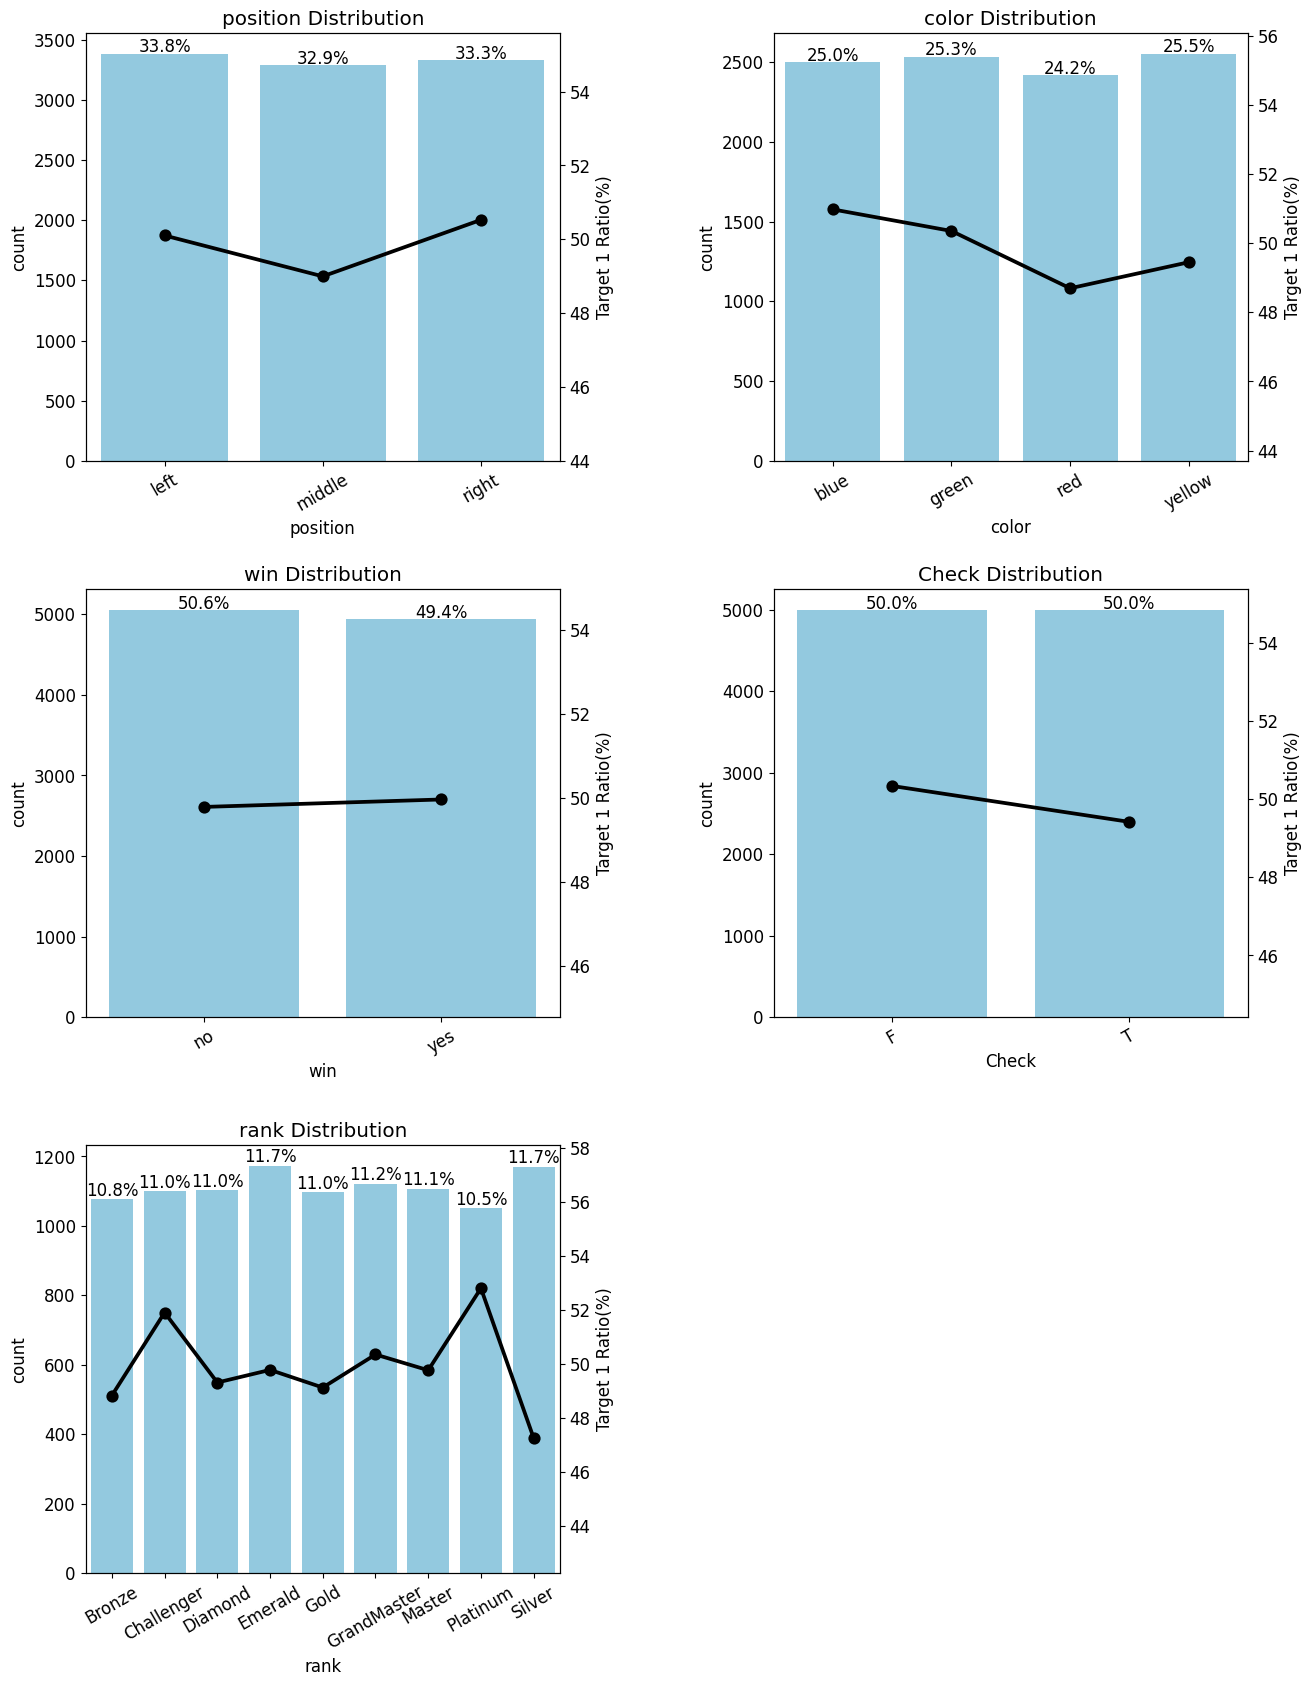

In [35]:
norm_features = []
for i in df.columns:   # 명목형 피처 리스트로 만들기
  if df[i].dtype == "object" and len(df[i].unique()) < 10: # unique값이 10개 이하인 컬럼만 선정
    norm_features.append(i)

plot_cat_dist_with_true_ratio(df, norm_features,
                              num_rows=len(norm_features)-2, num_cols=2)

순서정렬이 되지 않음 => CategoricalDtype(0을 이용하여 피처에 순서를 지정할 수 있음
  
* categories : 범주형 데이터 타입으로 인코딩할 값 목록  
* ordered : True로 설정하면 categories에 전달한 값의 순서가 유지됨

In [36]:
from pandas.api.types import CategoricalDtype

rank_value = ['Bronze', 'Silver', 'Gold','Platinum','Emerald','Diamond','Master','GrandMaster','Challenger']

# 순서를 지정한 범주형 데이터 타입
rank_dtype = CategoricalDtype(categories=rank_value, ordered=True)

# 데이터 타입 변경
df['rank'] = df['rank'].astype(rank_dtype)

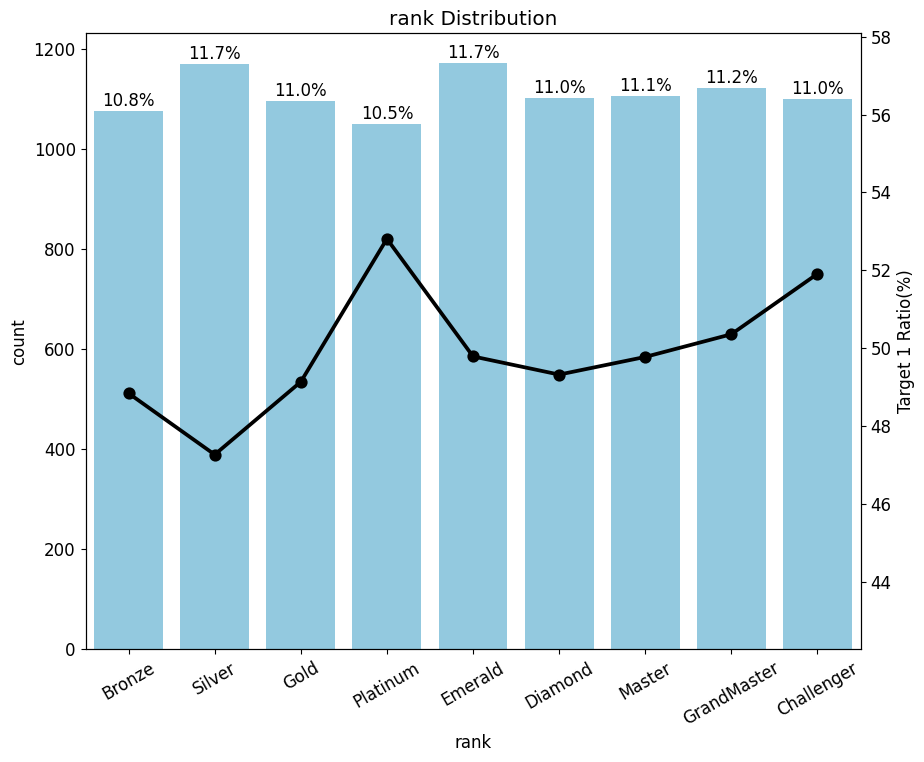

In [37]:
plot_cat_dist_with_true_ratio(df, ['rank'],
                              num_rows=1, num_cols=1, size=(10, 8))

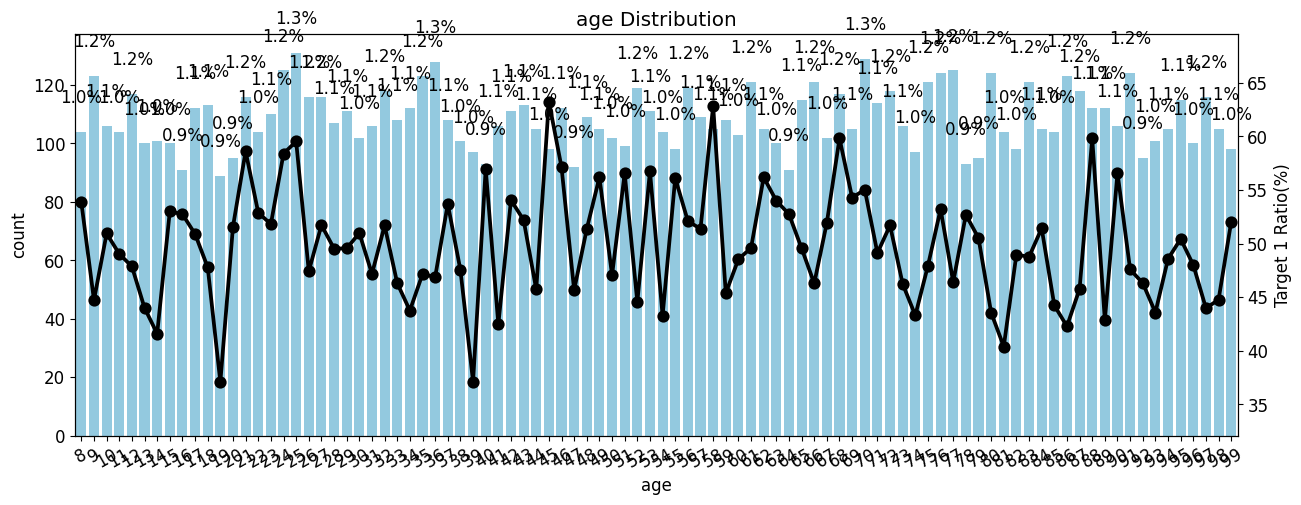

In [38]:
plot_cat_dist_with_true_ratio(df, ['age'],
                              num_rows=2, num_cols=1, size=(15, 12))